In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
#데이터 전처리
#모든 특징의 값을 동일한 스케일로 변환
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

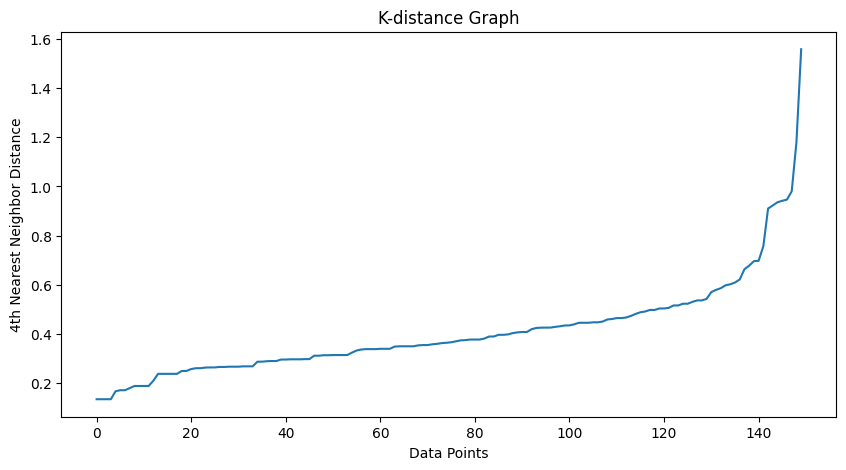

In [147]:
from sklearn.neighbors import NearestNeighbors

# k-거리 그래프를 사용하여 최적의 eps 찾기
nearest_neighbors = NearestNeighbors(n_neighbors=3)  # min_samples 값을 반영
neighbors = nearest_neighbors.fit(X_scaled)
distances, indices = neighbors.kneighbors(X_scaled)
distances = np.sort(distances[:, 2], axis=0)  # 3번째 이웃의 거리

plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('Data Points')
plt.ylabel('4th Nearest Neighbor Distance')
plt.show()

In [148]:
from sklearn.cluster import DBSCAN

# DBSCAN 모델 생성 및 학습
dbscan = DBSCAN(eps=0.65, min_samples=3)  # eps와 min_samples 값은 필요에 따라 조정 가능
dbscan.fit(X_scaled)

# 클러스터 레이블
labels = dbscan.labels_

#PCA를 사용한 차원감소
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)

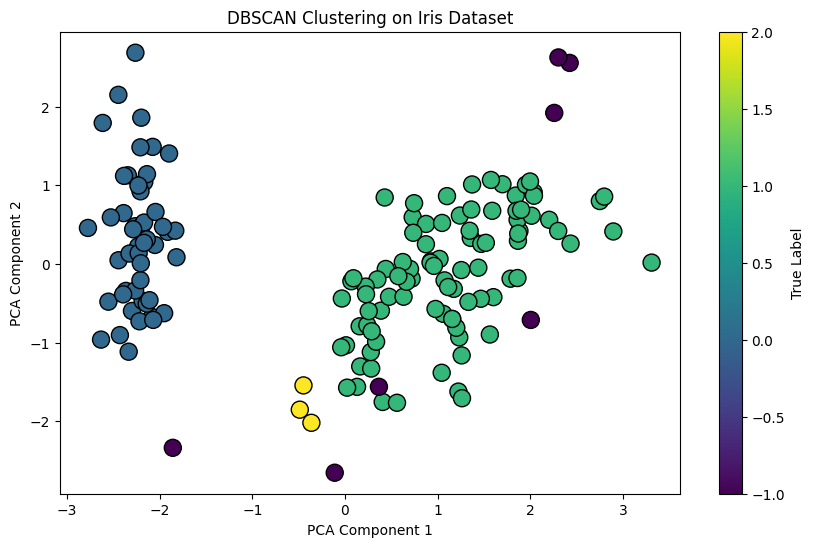

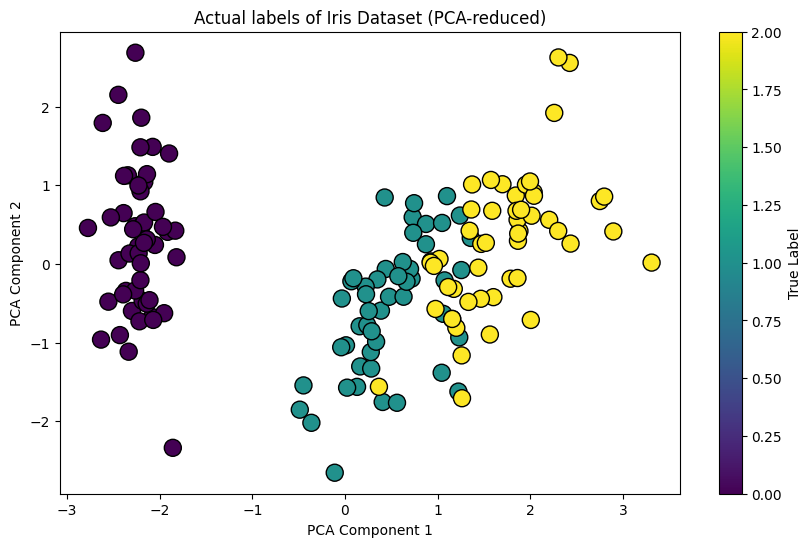

In [149]:
from matplotlib.pyplot import figure

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis',edgecolor='k', s=150)
plt.title('DBSCAN Clustering on Iris Dataset')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label = 'True Label')

plt.show()

#실제 라벨과 비교한 시각화
plt.figure(figsize=(10,6))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y,cmap='viridis',edgecolor='k',s=150)
plt.title('Actual labels of Iris Dataset (PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label = 'True Label')
plt.show()